In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import random

## Simulation for the one-lane road traffic

In [2]:
class TrafficSimulation:
    def __init__ (self, road_length = 100, traffic_density = 0.2, v_max = 5, p_slow_down = 0.1):
        self.road_length = road_length
        self.traffic_density = traffic_density 
        self.v_max = v_max 
        self.p_slow_down = p_slow_down
        self.current = [-1 for i in range (self.road_length)]
        self.next = [-1 for i in range (self.road_length)]
        self.time_step = 0
        self.flow_count = 0
    
    def initial (self): 
        cars = int (self.road_length * self.traffic_density)
        i = 0 
        while i < cars: 
            x = randint(0,self.road_length-1)
            if self.current[x] == -1:
                self.current[x] = randint(0,self.v_max)
                i +=1

    def speed_change (self):
        #Update velocity 
        for dx in range (self.road_length):
            if self.current [dx] > -1 : 
                #Check the distance between two cars 
                distance = 1
                for i in range (1,6): 
                    if (self.current[(dx+distance)%self.road_length]) == -1: 
                        distance = distance + 1
                    if (self.current[(dx+distance)%self.road_length]) > -1:
                        break
                
                #Accelerate if the velocity is less than the maximum velocity 
                if (self.current[dx] < self.v_max):
                    self.current[dx] +=1
                
                #Decelerate if the distance between two car is smaller than the velocity 
                if self.current[dx] > distance - 1: 
                    self.current[dx] = distance - 1
                
                #Random decceleration
                if (random.random () < self.p_slow_down) and (self.current[dx] > 0):
                    self.current[dx] = self.current[dx] - 1 
    
    def update (self): 
        self.time_step += 1
        flow_count = 0
        self.next = [-1 for i in range (self.road_length)]
        for i in range (self.road_length):
            if self.current[i] > -1:
                velocity = self.current[i]
                if i + velocity > self.road_length:
                    self.flow_count +=1
                self.next[int((i + velocity)%self.road_length)] = velocity 
        self.current = self.next
    
    def display(self):
        print('\033[0m'+''.join('\033[0m'+ '-' if x == -1 else '\033[91m' + str(int(x)) for x in self.current))
        print('\033[1m' + '\033[36m' + 'Time step:', self.time_step)

### Simulation with low density, low random deceleration

In [7]:
sim = TrafficSimulation(traffic_density=0.2)
sim.initial()
for i in range(100):
    sim.speed_change()
    sim.update()
    sim.display()
    
print('Traffic density:', sim.traffic_density)
print('Flow rate:', sim.flow_count / sim.time_step)

--2---2-----3-----0-1--1----------3-------1---3--2-----1--2-----------3-1----4-1-----5----0-1----4--
Time step: 1
-4---3---3------4--1--2--2------------4-----2---2---3----2---3--------0---2---1--2-------4-1--2-----
Time step: 2
----3---3----4----2-1---2---3--------------5---3---3---3---2-----4-----1-----3--2---3-----1--2---3--
Time step: 3
-4-----3---3-----4-1--2----3----4------------2---2----3---3---3-------5--2-----2---3----4---2---3---
Time step: 4
4-----5---3----4--1--2---3-----4-----5---------2----3----3---3----4-----2---3-----3----4---3---3----
Time step: 5
-----5---3----4--2--2--2-----4------5-----5------2------4---3----4----4----3---3------4---3---3----4
Time step: 6
---4----3----4-1---2-1----3-------5------5-----5----3------3----4----4---3----3----4-----3--2-----4-
Time step: 7
-3-----4----4-1--2--1--2------4--------5------5----4----4------4----4---3----4----4----4---2---3----
Time step: 8
-----4-----4-1-1---2--2---3--------5--------5-----4---3------5-----4---3----4---3-----4-

### Simulation with high density, low random deceleration

In [4]:
sim = TrafficSimulation(traffic_density=0.4)
sim.initial()
for i in range(100):
    sim.speed_change()
    sim.update()
    sim.display()
    
print('Traffic density:', sim.traffic_density)
print('Flow rate:', sim.flow_count / sim.time_step)

---300--2---3--0-1----4-----3---3-10-1--200-1-0-1-1-100--1-0---1----0-1---1---300--20--2---30--2--00
Time step: 1
1--000-----3--2-1--2-------5---3-100---200-1-1-1-1-100-1--1-1----2--0---2---2-00-1-00-----30-1--1-0-
Time step: 2
--200-1------2-1-1----3-------3-100-1--000--1-10--100-1--2-1-1-----2-1-----3-10-1-10-1----00---2-1-1
Time step: 3
-200-1--2-----1-1--2------4----100-1--200-1--100--000---2-1-1--2----1--2----10-1-10-1--2--0-1---1-1-
Time step: 4
200-1--2---3---1--2--2--------400-1--2000---200-1-00-1---1-1--2---3---2---3-0-1-100---2-1--1--2--1--
Time step: 5
00-1-1----3---3--2--2---3-----00-1--2000-1--00-1-10-1--2--1--2---3---3---3-1-1-100-1---1--2--2--2-1-
Time step: 6
0-1-1--2-----3-1---2---3----4-0-1--2000-1--20-1-100---2--2-1----3---3---3-1-1-100-1--2--1---2-1-0--1
Time step: 7
-10---2---3---1--2----3---3--10---2000-1--20-1-100-1----2-1--2-----3---3-1-1-100-1--2--2--2--1-1-1-0
Time step: 8
10-1-----3---3--2---3----3--20-1--000-1--20-1-100-1--2---1--2---3-----3-1-1-100-1--2--2-

### Simulation with low density, high random deceleration

In [9]:
sim = TrafficSimulation(traffic_density=0.2, p_slow_down = 0.5)
sim.initial()
for i in range(100):
    sim.speed_change()
    sim.update()
    sim.display()
    
print('Traffic density:', sim.traffic_density)
print ('Random deceleration', sim.p_slow_down)
print('Flow rate:', sim.flow_count / sim.time_step)

4-----0-1--------5---------2-0-------4--1---3-00------------50-0-----------3-------4-1---3--0-1-----
Time step: 1
----4--1--2-----------5-----10---------2--2-0-00------------0-1-1-------------3-----1--2--1--1-1----
Time step: 2
------2-1----3------------4-00-----------2-10-00-------------10---2---------------4---2-1---20--1---
Time step: 3
-------1--2------4---------100------------100-00-------------00------3---------------3-1-1--0-1---2-
Time step: 4
-3-------2---3-------4-----00-1-----------000-0-1------------00---------3------------0-0--1-0---2---
Time step: 5
----3------2-----4--------50-1--2---------00-10--1-----------00-------------4---------1-1--1-1----2-
Time step: 6
2-------4----2-------4----0-1-1---2-------00-0-1--1----------00-----------------4------1-1--1--2----
Time step: 7
--2--------3---2---------40--1--2---2-----00-0--1--1---------0-1---------------------5-0--1---2--2--
Time step: 8
3---2--------2----3------00----2---3---3--00-0----2-1--------0---2-------------------0--

### Flow rate of the one lane road, with small probability of slowing down

In [11]:
densities = np.linspace(0,1,num=30)
flow_rates = np.zeros((30,3))
repeats = 20
total = 100

#iterate through densities
for n in range(len(densities)):
    d = densities[n]
    #create empty array for averaging
    rate = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig4 = TrafficSimulation(traffic_density=d)
        fig4.initial()
        for j in range(total):
            fig4.speed_change()
            fig4.update()
        rate[i] = fig4.flow_count/total
        #print(fig4.cumulative_traffic_flow)
    flow_rates[n,0] = (np.mean(rate))
    flow_rates[n,1] = np.percentile(rate,2.5)
    flow_rates[n,2] = np.percentile(rate,97.5)

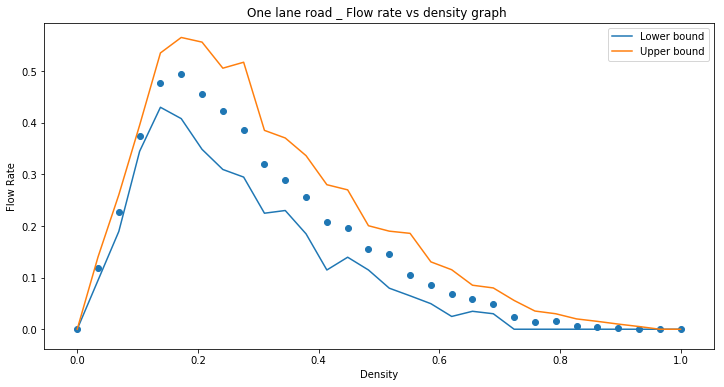

This one-lane model is made with with 100 road length, 0.1 slow down rate and 5 maximum velocity


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.scatter (densities,flow_rates[:,0])
plt.plot(densities,flow_rates[:,1], label = 'Lower bound')
plt.plot(densities,flow_rates[:,2], label = 'Upper bound')
plt.title ('One lane road _ Flow rate vs density graph ')
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.legend()
plt.show()

print ('This one-lane model is made with with %i road length, %.1f slow down rate and %i maximum velocity' % (100,0.1,5))

## Traffic flow - Two lane road

In [2]:
class TrafficSimulation2:
    def __init__ (self, road_length = 100, traffic_density = 0.2, v_max = 5, p_slow_down = 0.1):
        
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            road_length (int) The number of cells in the road. Default: 100.

            traffic_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            p_slow_down (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.1.

            v_max (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        
        self.road_length = road_length
        self.traffic_density = traffic_density 
        self.v_max = v_max 
        self.p_slow_down = p_slow_down
        
        '''
        Create the structure of the road: 
            
            self.current: an array with 2 rows and road_length columns. This represents the condition of the road
                after update step 
            
            self.temporary: an array with 2 rows and road_length columns. This array contains the temporary condition
                of the simulation, when the car checks whether it will change lanes or not
        '''
        
        #Create the structure of the road
        self.current = -np.ones ((2, self.road_length))
        self.temporary = -np.ones ((2, self.road_length))
        self.flow_count = 0
        self.time_step = 0
        
    def initial (self): 
        cars = int (self.road_length * 2 * self.traffic_density)
        i = 0 
        #randomly create cars on the 2-lane road
        while i < cars: 
            #Position of the car
            x_1 = randint(0,self.road_length-1)
            #Which lane will the car appear?
            x_2 = randint(0,1)
            if self.current[x_2][x_1] == -1:
                self.current[x_2][x_1] = randint(0,self.v_max)
                i +=1
                
    def position_speed_change (self):
        
        #CHECK IF A CAR NEEDS TO CHANGE LANES. STORE POSITIONS OF CARS IN THE TEMPORARY ARRAY
        
        self.temporary = -np.ones ((2, self.road_length))
        for dx in range (self.current.shape[0]):
            for dy in range (self.current.shape[1]):
                if self.current [dx][dy] > -1 : 
                    #Check the gap between two cars plus 1 (in the current lane)
                    distance = 1
                    while self.current[dx][(dy+distance) % self.road_length] == -1: 
                        distance+=1
                    
                    #If gap < v + 1 , check the other lane
                    if self.current[dx][dy] + 1 > distance - 1:
                        #Check the forward distance
                        forward = 1
                        backward = 1 
                        while self.current[(dx+1)%2][(dy+forward) % self.road_length] == -1: 
                            forward+=1
                        #Check the backward distance
                        while self.current[(dx+1)%2][(dy-backward) % self.road_length] == -1: 
                            backward+=1
                        if forward - 1 >= self.current[dx][dy] + 1 and backward > self.v_max \
                        and self.current[(dx+1)%2][dy] == -1:
                            self.temporary[(dx+1)%2][dy] = self.current[dx][dy]
                        else: 
                            self.temporary[dx][dy] = self.current[dx][dy]
                    else: 
                        self.temporary[dx][dy] = self.current[dx][dy]
    
        #UPDATE THE VELOCITY OF THE TEMPORARY ARRAY
        
        for dx in range (self.temporary.shape[0]):
            for dy in range (self.temporary.shape[1]):
                if self.temporary[dx][dy] > -1:
                    #Accelerate if the velocity is less than the maximum velocity 
                    if (self.temporary[dx][dy] < self.v_max):
                        self.temporary[dx][dy] +=1
                    distance = 1
                    while self.temporary[dx][(dy+distance) % self.road_length] == -1: 
                        distance+=1
                    
                    #Decelerate if the distance between two car is smaller than the velocity 
                    if self.temporary[dx][dy] > distance - 1: 
                        self.temporary[dx][dy] = distance - 1
                
                    #Random decceleration
                    if (random.random () < self.p_slow_down) and (self.temporary[dx][dy] > 0):
                        self.temporary[dx][dy] = self.temporary[dx][dy] - 1 
    
    #UPDATE THE POSITION OF THE CAR
    
    def update (self): 
        self.time_step += 1
        self.current = -np.ones ((2, self.road_length))
        for dx in range (self.current.shape[0]):
            for dy in range (self.current.shape[1]):
                    if self.temporary[dx][dy] > -1:
                        velocity = self.temporary[dx][dy]
                        self.current[dx][int((dy + velocity)%self.road_length)] = velocity 
                        if dy + velocity > self.road_length:
                            self.flow_count +=1
    
    #DISPLAY
    def display(self):
        for a in range (2):
            print('\033[0m'+ ''.join('\033[0m'+ '-' if x == -1 else '\033[91m' + str(int(x)) for x in self.current[a]))
        print('\033[1m' + '\033[36m' + 'Time step:', self.time_step)

### Two-lane road model with low density value and low random deceleration

In [19]:
# Simulate higher traffic density to see traffic jams forming
sim = TrafficSimulation2(traffic_density=0.1)
sim.initial()
sim.display()

for i in range (100):
    sim.position_speed_change()
    sim.update()
    sim.display()

print('Traffic density:', sim.traffic_density)
print('Flow rate:', sim.flow_count/(sim.time_step*2))
print('Random deceleration', sim.p_slow_down)

----55---------------3------5-----1--------------5-------------------4------5------3---0-----2------
--1--------2--------------------------------------2------2--5---------------3--------2---------3-1--
Time step: 0
----0-----5--------------4----------2----------------4------3-------------5------5----3-1-------3---
----2---------3-----------------4--------------------3-----------5--------------4-------3-------1--2
Time step: 1
4----1---------5-------------4---------3------------------5----3---------------5----3--1--2---------
--3---2-----------4------------------5-------------------4------------5--------------5------4-----2-
Time step: 2
----4--2------------5-------------5--------4------------------4----4---------------4--2--2---3------
-3---3--2--------------5------------------5-------------------5-----------4---------------5------5--
Time step: 3
------2---3--------------5-------------5--------5----------------3------5-------------------3----4--
3---3--2---3----------------5----------

### Simulation with high density value

In [17]:
# Simulate higher traffic density to see traffic jams forming
sim = TrafficSimulation2(traffic_density=0.4)
sim.initial()
sim.display()

for i in range (100):
    sim.position_speed_change()
    sim.update()
    sim.display()

print('Traffic density:', sim.traffic_density)
print('Flow rate:', sim.flow_count/(sim.time_step*2))
print('Random deceleration', sim.p_slow_down)

55--51----0--4----5--3-2---13------4-5---4---2----40-4-1---2022--3-53-0-5-55-3-1--2--22---5--------5
--------5--5131532-3--33--0-5-22-344---0--2243---255-4----32-2--35--2---45----3--15----0-43--3----5-
Time step: 0
0--20--2---1-----4--2-1---30---3----1---3---3---3-0-1-1--2-000--20-0-1-10-0-1-1--2--20---3-----5---0
---5------2000000-1--20--2-1-10-100---3-1-000---300-1----40-1--20-1----30----4--20----4-10--2----4--
Time step: 1
-1---1----3--2-----2-1--2-0-1------4--2----3---3-1-1-1--2-1000--0-1-1-10-1-1-1--2--20-1------4----30
--5-----5-000000-1--20-1--1-10-100-1---1-100-1--00-1--2--0-1--20-1--2--0-1-----20-1----10-1----3----
Time step: 2
1--2---2----2---3---1--2-10---2------2--2-----3-1-1-1--2-1000-1--1-1-10-1-1-1--2--20-1--2--------40-
-------5-100000-1--20-1-1--10-100-1--2--100-1--20-1--2--2-1--20-1--2--20--1----0-1--2--0-1--2------4
Time step: 3
--2---3---3----3---3-1-0-0-1-----3-----2---3---1-1-1--2-1000-1--2-10-0-10-0---2-1-0-1--2---3-----0-1
----5---100000-1--20-1-1--20-100-1--2--

### Flow rate of two-lane road with a small probability of slowing down

In [6]:
densities = np.linspace(0,1,num=30)
flow_rates_2 = np.zeros((30,3))
repeats = 20
total = 100

#iterate through densities
for n in range(len(densities)):
    d = densities[n]
    #create empty array for averaging
    rate_2 = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig4 = TrafficSimulation2(traffic_density=d)
        fig4.initial()
        for j in range(total):
            fig4.position_speed_change()
            fig4.update()
        rate_2[i] = fig4.flow_count/(total*2)
        #print(traffic flow)
    flow_rates_2[n,0] = (np.mean(rate_2))
    flow_rates_2[n,1] = np.percentile(rate_2,2.5)
    flow_rates_2[n,2] = np.percentile(rate_2,97.5)

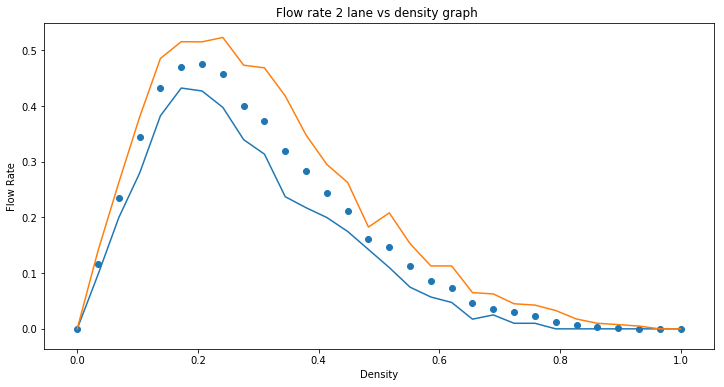

This two-lane model is made with with 100 road length, 0.1 slow down rate and 5 maximum velocity


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.scatter (densities,flow_rates_2[:,0])
plt.plot(densities,flow_rates_2[:,1])
plt.plot(densities,flow_rates_2[:,2])
plt.title ('Flow rate 2 lane vs density graph _ Small probability of slowing down')
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.show()

print ('This two-lane model is made with with %i road length, %.1f slow down rate and %i maximum velocity' % (100,0.1,5))

### Comparing the traffic flow of two model given the small probability of slowing down

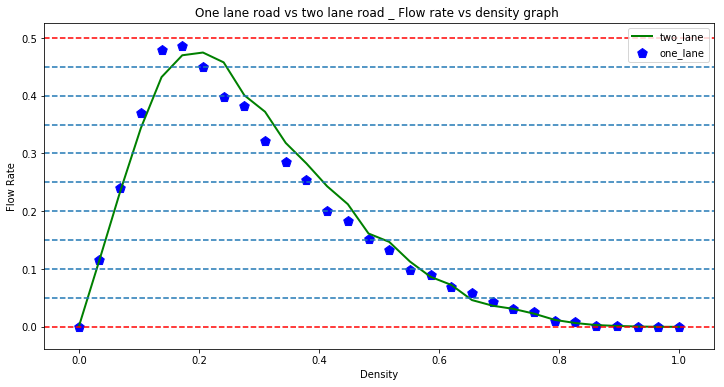

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))

plt.scatter (densities,flow_rates[:,0], label = 'one_lane', marker='p',s = 100, color='blue')
plt.plot (densities,flow_rates_2[:,0], label = 'two_lane', linewidth=2, color = 'g')
plt.title ('One lane road vs two lane road _ Flow rate vs density graph ')
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.legend()
plt.axhline(0.05,linestyle='--')
plt.axhline(0.1,linestyle='--')
plt.axhline(0.15,linestyle='--')
plt.axhline(0.2,linestyle='--')
plt.axhline(0.25,linestyle='--')
plt.axhline(0.3,linestyle='--')
plt.axhline(0.35,linestyle='--')
plt.axhline(0.4,linestyle='--')
plt.axhline(0.45,linestyle='--')
plt.axhline(0.5,color='red',linestyle='--')
plt.axhline(0,color='red',linestyle='--')
plt.show()

### Flow rate of the one lane road, with a high probability of slowing down

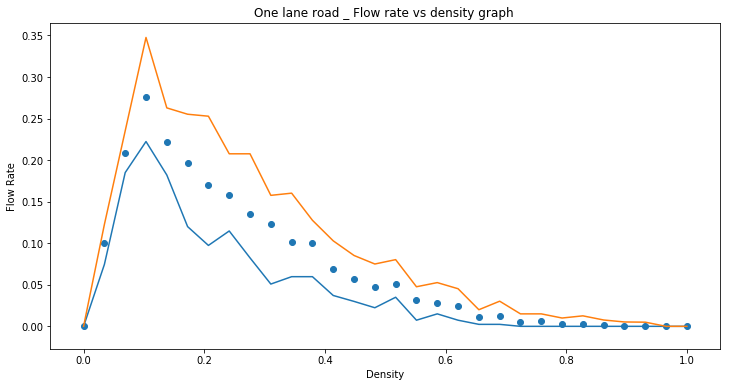

This one-lane model is made with with 100 road length, 0.5 slow down rate and 5 maximum velocity


In [5]:
densities = np.linspace(0,1,num=30)
flow_rates = np.zeros((30,3))
repeats = 20
total = 200

#iterate through densities
for n in range(len(densities)):
    d = densities[n]
    #create empty array for averaging
    rate = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig4 = TrafficSimulation(traffic_density=d, p_slow_down = 0.5)
        fig4.initial()
        for j in range(total):
            fig4.speed_change()
            fig4.update()
        rate[i] = fig4.flow_count/total
        #print(traffic flow)
    flow_rates[n,0] = (np.mean(rate))
    flow_rates[n,1] = np.percentile(rate,2.5)
    flow_rates[n,2] = np.percentile(rate,97.5)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.scatter (densities,flow_rates[:,0])
plt.plot(densities,flow_rates[:,1])
plt.plot(densities,flow_rates[:,2])
plt.title ('One lane road _ Flow rate vs density graph ')
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.show()

print ('This one-lane model is made with with %i road length, %.1f slow down rate and %i maximum velocity' % (100,0.5,5))

### Flow rate of two-lane road with a high probability of slowing down

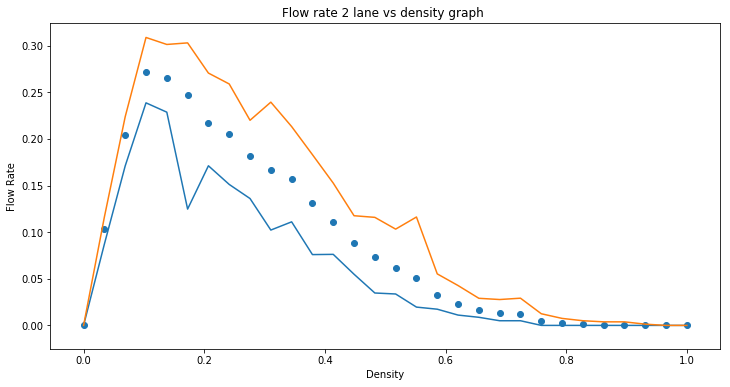

This two-lane model is made with with 100 road length, 0.5 slow down rate and 5 maximum velocity


In [3]:
densities = np.linspace(0,1,num=30)
flow_rates_2 = np.zeros((30,3))
repeats = 20
total = 200

#iterate through densities
for n in range(len(densities)):
    d = densities[n]
    #create empty array for averaging
    rate_2 = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig4 = TrafficSimulation2(traffic_density=d, p_slow_down = 0.5)
        fig4.initial()
        for j in range(total):
            fig4.position_speed_change()
            fig4.update()
        rate_2[i] = fig4.flow_count/(total*2)
        #print(traffic_flow)
    flow_rates_2[n,0] = (np.mean(rate_2))
    flow_rates_2[n,1] = np.percentile(rate_2,2.5)
    flow_rates_2[n,2] = np.percentile(rate_2,97.5)
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.scatter (densities,flow_rates_2[:,0])
plt.plot(densities,flow_rates_2[:,1])
plt.plot(densities,flow_rates_2[:,2])
plt.title ('Flow rate 2 lane vs density graph ')
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.show()

print ('This two-lane model is made with with %i road length, %.1f slow down rate and %i maximum velocity' % (100,0.5,5))

### Comparing the traffic flow of two model given the high probability of slowing down

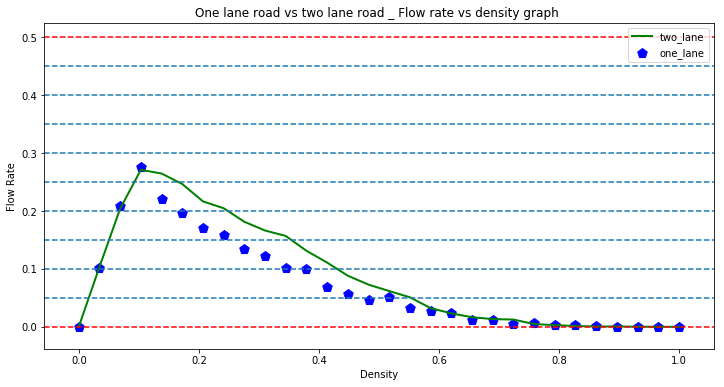

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))

plt.scatter (densities,flow_rates[:,0], label = 'one_lane', marker='p',s = 100, color='blue')
plt.plot (densities,flow_rates_2[:,0], label = 'two_lane', linewidth=2, color = 'g')
plt.title ('One lane road vs two lane road _ Flow rate vs density graph ')
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.legend()
plt.axhline(0.05,linestyle='--')
plt.axhline(0.1,linestyle='--')
plt.axhline(0.15,linestyle='--')
plt.axhline(0.2,linestyle='--')
plt.axhline(0.25,linestyle='--')
plt.axhline(0.3,linestyle='--')
plt.axhline(0.35,linestyle='--')
plt.axhline(0.4,linestyle='--')
plt.axhline(0.45,linestyle='--')
plt.axhline(0.5,color='red',linestyle='--')
plt.axhline(0,color='red',linestyle='--')
plt.show()

## Three-lane model

In [4]:
class TrafficSimulation_3_lane:
    def __init__ (self, road_length = 100, traffic_density = 0.2, v_max = 5, p_slow_down = 0.1):
        
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            road_length (int) The number of cells in the road. Default: 100.

            traffic_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            p_slow_down (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.1.

            v_max (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        
        self.road_length = road_length
        self.traffic_density = traffic_density 
        self.v_max = v_max 
        self.p_slow_down = p_slow_down
        
        '''
        Create the structure of the road: 
            
            self.current: an array with 2 rows and road_length columns. This represents the condition of the road
                after update step 
            
            self.temporary: an array with 2 rows and road_length columns. This array contains the temporary condition
                of the simulation, when the car checks whether it will change lanes or not
        '''
        
        #Create the structure of the road
        self.current = -np.ones ((3, self.road_length))
        self.temporary = -np.ones ((3, self.road_length))
        self.flow_count = 0
        self.time_step = 0
        
    def initial (self): 
        cars = int (self.road_length * 3 * self.traffic_density)
        i = 0 
        #randomly create cars on the 3-lane road
        while i < cars: 
            #Position of the car
            x_1 = randint(0,self.road_length-1)
            #Which lane will the car appear?
            x_2 = randint(0,2)
            if self.current[x_2][x_1] == -1:
                self.current[x_2][x_1] = randint(0,self.v_max)
                i +=1
                
    def position_speed_change (self):
        
        #CHECK IF A CAR NEEDS TO CHANGE LANES. STORE POSITIONS OF CARS IN THE TEMPORARY ARRAY
        
        self.temporary = -np.ones ((3, self.road_length))
        for dx in range (self.current.shape[0]):
            for dy in range (self.current.shape[1]):
                if self.current [dx][dy] > -1 : 
                    #Check the gap between two cars plus 1 (in the current lane)
                    distance = 1
                    while self.current[dx][(dy+distance) % self.road_length] == -1: 
                        distance+=1
                    
                    #If gap < v + 1 , check the right lane
                    if self.current[dx][dy] + 1 > distance - 1:
                        #Check the forward distance
                        forward_right = 1
                        backward_right = 1 
                        forward_left = 1
                        backward_left = 1
                        while self.current[(dx+1)%2][(dy+forward_right) % self.road_length] == -1: 
                            forward_right+=1
                        while self.current[(dx-1)%2][(dy+forward_left) % self.road_length] == -1: 
                            forward_left+=1
                        
                        #Check the backward distance
                        while self.current[(dx+1)%2][(dy-backward_right) % self.road_length] == -1: 
                            backward_right+=1
                        while self.current[(dx-1)%2][(dy-backward_left) % self.road_length] == -1: 
                            backward_left+=1
                        
                        if forward_right - 1 >= self.current[dx][dy] + 1 and backward_right > self.v_max \
                        and self.current[(dx+1)%2][dy] == -1:
                            self.temporary[(dx+1)%2][dy] = self.current[dx][dy]
                        elif forward_left - 1 >= self.current[dx][dy] + 1 and backward_left > self.v_max \
                            and self.current[(dx-1)%2][dy] == -1:
                            self.temporary[(dx-1)%2][dy] = self.current[dx][dy]
                        else:
                            self.temporary[dx][dy] = self.current[dx][dy]
                    else: 
                        self.temporary[dx][dy] = self.current[dx][dy]
    
        #UPDATE THE VELOCITY OF THE TEMPORARY ARRAY
        
        for dx in range (self.temporary.shape[0]):
            for dy in range (self.temporary.shape[1]):
                if self.temporary[dx][dy] > -1:
                    #Accelerate if the velocity is less than the maximum velocity 
                    if (self.temporary[dx][dy] < self.v_max):
                        self.temporary[dx][dy] +=1
                    distance = 1
                    while self.temporary[dx][(dy+distance) % self.road_length] == -1: 
                        distance+=1
                    
                    #Decelerate if the distance between two car is smaller than the velocity 
                    if self.temporary[dx][dy] > distance - 1: 
                        self.temporary[dx][dy] = distance - 1
                
                    #Random decceleration
                    if (random.random () < self.p_slow_down) and (self.temporary[dx][dy] > 0):
                        self.temporary[dx][dy] = self.temporary[dx][dy] - 1 
    
    #UPDATE THE POSITION OF THE CAR
    
    def update (self): 
        self.time_step += 1
        self.current = -np.ones ((3, self.road_length))
        for dx in range (self.current.shape[0]):
            for dy in range (self.current.shape[1]):
                    if self.temporary[dx][dy] > -1:
                        velocity = self.temporary[dx][dy]
                        self.current[dx][int((dy + velocity)%self.road_length)] = velocity 
                        if dy + velocity > self.road_length:
                            self.flow_count +=1
    
    #DISPLAY
    def display(self):
        for a in range (3):
            print('\033[0m'+ ''.join('\033[0m'+ '-' if x == -1 else '\033[91m' + str(int(x)) for x in self.current[a]))
        print('\033[1m' + '\033[36m' + 'Time step:', self.time_step)

In [28]:
# Simulate higher traffic density to see traffic jams forming
sim = TrafficSimulation_3_lane(traffic_density=0.4)
sim.initial()
sim.display()

for i in range (10):
    sim.position_speed_change()
    sim.update()
    sim.display()

print('Traffic density:', sim.traffic_density)
print('Flow rate:', sim.flow_count/(sim.time_step*2))
print('Random deceleration', sim.p_slow_down)

00-5-3-3---504----3-5-0-0-50--1-1-4-4---2--4---553-404-4-0-321-5-----4--035---4-23-----------335-55-
23-1-4-14--03--2-424-13----0-3--1---14-2--21---54------11--2-1-0-504--55---2-0000----21---4-3-------
-5-0--3--0-50---3--22-4-----0-0-52-2--50--323------0----54-3----4-----4-2-52-2----------------34---0
Time step: 0
0-1-1-1---300----4-1-1-1-10-1--1-1-1---3--2---300-100-1-1-100-1-----5--200---3-10----4-------00-10-1
00--1-10--20--2-100-10----40--1---2-00---20-1--0-----5-0--2-10--100--20--2--1000-1---0--2--1----4---
10-0----2-10-1---1-0-1----4--1-10-1--200--00----4--0----0-1----4-----5-1-10-1---3-------------0---3-
Time step: 1
-1-1-1--2-00-1----1-1-1-10-1--2-1-1--2---2---300-100-1-1-100-1--2----1-00-1---10-1--------5--00-0-10
0-1--10-1-0-1--100-10-1---0-1---2--10-1--0-1--2-1-----1-1--10-1-00-1-0-1---2000-1--2--1--1---2-----3
0-1-1----10-1--2--1-1--2----2-10-1--200-1-0-1----1-0-----1--2-------5-1-10-1--2-----4----------1---1
Time step: 2
1-1-1--20-0-1-1---0--1-10-1--2-1-1--2---3---300-100-

### Compare the flow rate of one-lane, two-lane and three-lane model given 0.4 density

In [ ]:
random_deceleration = np.linspace(0,0.8,num=20)
flow_rates_all = np.zeros((20,3))
repeats = 20
total = 100

#iterate through random deceleration
for n in range(len(random_deceleration)):
    d = random_deceleration[n]
    #create empty array for averaging
    rate_1 = np.zeros(repeats)
    rate_2 = np.zeros(repeats)
    rate_3 = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig1 = TrafficSimulation(traffic_density=0.4, p_slow_down = d)
        fig1.initial()
        fig2 = TrafficSimulation2(traffic_density=0.4, p_slow_down = d)
        fig2.initial()
        fig3 = TrafficSimulation_3_lane(traffic_density=0.4, p_slow_down = d)
        fig3.initial()
        for j in range(total):
            fig1.speed_change()
            fig1.update()
            fig2.position_speed_change()
            fig2.update()
            fig3.position_speed_change()
            fig3.update()            
        rate_1[i] = fig1.flow_count/total
        rate_2[i] = fig2.flow_count/(total*2)
        rate_3[i] = fig3.flow_count/(total*3)
        #print(fig.flow_rate)
    flow_rates_all[n,0] = (np.mean(rate_1))
    flow_rates_all[n,1] = (np.mean(rate_2))
    flow_rates_all[n,2] = (np.mean(rate_3))

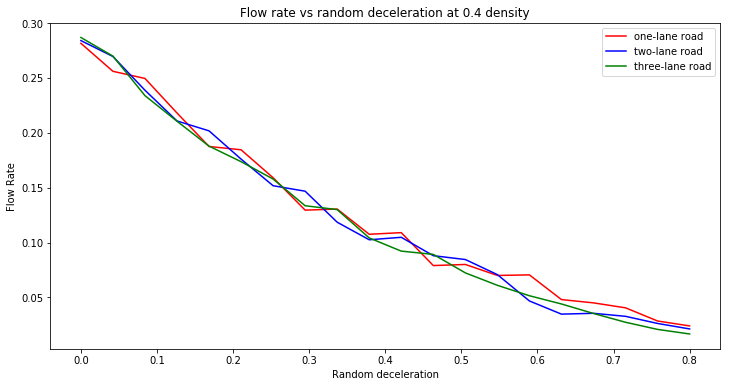

This  model is made with with 100 road length, 0.4 density and 5 maximum velocity


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot (random_deceleration,flow_rates_all[:,0], color = 'r', label = 'one-lane road')
plt.plot(random_deceleration,flow_rates_all[:,1], color = 'b', label = 'two-lane road')
plt.plot(random_deceleration,flow_rates_all[:,2], color = 'g', label = 'three-lane road')
plt.title ('Flow rate vs random deceleration at 0.4 density')
plt.xlabel("Random deceleration")
plt.ylabel("Flow Rate")
plt.legend()
plt.show()

print ('This  model is made with with %i road length, %.1f density and %i maximum velocity' % (100,0.4,5))

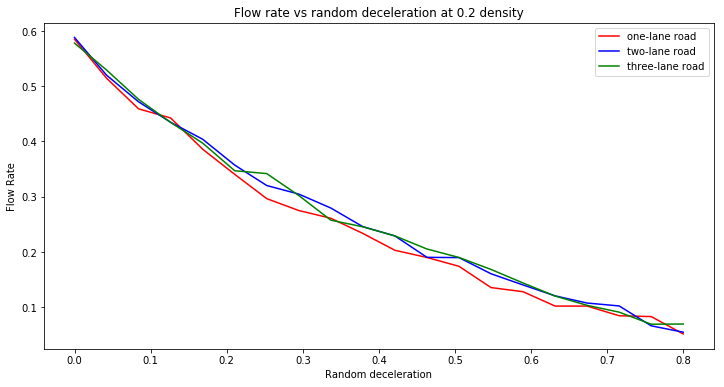

This  model is made with with 100 road length, 0.2 density and 5 maximum velocity


In [12]:
random_deceleration = np.linspace(0,0.8,num=20)
flow_rates_all = np.zeros((20,3))
repeats = 20
total = 100

#iterate through random deceleration
for n in range(len(random_deceleration)):
    d = random_deceleration[n]
    #create empty array for averaging
    rate_1 = np.zeros(repeats)
    rate_2 = np.zeros(repeats)
    rate_3 = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig1 = TrafficSimulation(traffic_density=0.2, p_slow_down = d)
        fig1.initial()
        fig2 = TrafficSimulation2(traffic_density=0.2, p_slow_down = d)
        fig2.initial()
        fig3 = TrafficSimulation_3_lane(traffic_density=0.2, p_slow_down = d)
        fig3.initial()
        for j in range(total):
            fig1.speed_change()
            fig1.update()
            fig2.position_speed_change()
            fig2.update()
            fig3.position_speed_change()
            fig3.update()            
        rate_1[i] = fig1.flow_count/total
        rate_2[i] = fig2.flow_count/(total*2)
        rate_3[i] = fig3.flow_count/(total*3)
        #print(fig.flow_rate)
    flow_rates_all[n,0] = (np.mean(rate_1))
    flow_rates_all[n,1] = (np.mean(rate_2))
    flow_rates_all[n,2] = (np.mean(rate_3))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot (random_deceleration,flow_rates_all[:,0], color = 'r', label = 'one-lane road')
plt.plot(random_deceleration,flow_rates_all[:,1], color = 'b', label = 'two-lane road')
plt.plot(random_deceleration,flow_rates_all[:,2], color = 'g', label = 'three-lane road')
plt.title ('Flow rate vs random deceleration at 0.2 density')
plt.xlabel("Random deceleration")
plt.ylabel("Flow Rate")
plt.legend()
plt.show()

print ('This  model is made with with %i road length, %.1f density and %i maximum velocity' % (100,0.2,5))

In [20]:
print ('Average flow rate difference between three-lane roand and one-lane road is:', 
       np.mean(flow_rates_all[:,2] - flow_rates_all[:,0]))
print ('Proportional difference is:', np.mean(flow_rates_all[:,2] - flow_rates_all[:,0])/np.mean(flow_rates_all[:,0]))

Average flow rate difference between three-lane roand and one-lane road is: 0.012583333333333313
Proportional difference is: 0.04986460603658931


## Stretch goal

In [3]:
'''
Update rule

    Each driver is assigned a probability of bad driving behavior, ranging from 0 to 0.5. This probability 
        represents the probability that a driver will change lane without looking back. 
    
    When a driver changes lane without looking back, there is a probability that he/she will change the lane at the position 
        which aother driver is driving toward. If the velocity of the driver at the back is equal or larger than the 
        changing lane position, we calculate the probability of collision. 
        
    We calculate the probability of collision by multiplying the probability of bad driving behavior of two drivers. If the 
        random number < P(driver_1)*p(driver_2), accident occurs. Other wise, the driver at the back will reduce the speed 
        as normal
    
    When collision occurs, the road will be blocked for 5 time steps. Cars will not be able to move past the collision cell.  
'''

class TrafficSimulation3:
    def __init__ (self, road_length = 100, traffic_density = 0.2, v_max = 5, p_slow_down = 0.1):
        
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities and the bad driving behavior probability.

        Inputs:

            road_length (int) The number of cells in the road. Default: 100.

            traffic_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            p_slow_down (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.1.

            v_max (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        
        self.road_length = road_length
        self.traffic_density = traffic_density 
        self.v_max = v_max 
        self.p_slow_down = p_slow_down
        
        '''
        Create the structure of the road: 
            
            self.current: an array with 2 rows and road_length columns. This represents the condition of the road
                after update step 
                            
            self.temporary: an array with 2 rows and road_length columns. This array contains the simulation 
            
            self.accident_time_step: track the time step of the accident. 
            
            self.bad_driving_pool: this list stores the bad_driving_behavior of the drivers. Driving behavior
                of each driver will be randomly chosen from this list
        '''
        
        #Create the structure of the road
        self.current = -np.ones ((2, self.road_length))
        self.temporary = -np.ones ((2, self.road_length))
        self.accident_time_step = np.zeros((2, self.road_length))
        self.time_step = 0
        self.bad_driving_pool = []
        self.flow_count = 0
       
        '''
        In the two-lane road model, each cell represents the velocity of a car. In this new model, each cell represents 
            the velocity of a car (integer part) and the bad driving behavior (fraction part). Thus, each cell is a 
            floating number (e.g: 5.1 implies that the current speed is 5 and the probability of bad driving is 0.1)
        
        '''
        
    def initial (self): 
        cars = int (self.road_length * 2 * self.traffic_density)
        
        #Create a pool of bad driving behavior drivers
        bad_driving_behavior = [0, 1, 2, 3, 4, 5]
        bad_driving_prob = [10, 40, 30, 10, 5, 5]
        for i in range (len(bad_driving_behavior)):
            self.bad_driving_pool += [bad_driving_behavior[i]] * bad_driving_prob[i]
        
        #randomly create cars on the 2-lane road
        i = 0 
        while i < cars: 
            #Y_axis position of the car
            x_1 = randint(0,self.road_length-1)
            #X_axis position of the car
            x_2 = randint(0,1)
            if self.current[x_2][x_1] == -1:
                self.current[x_2][x_1] = randint(0,self.v_max) + random.choice (self.bad_driving_pool) / 10
                i +=1
                
    def change_lane (self):
        
        self.temporary = -np.ones ((2, self.road_length))
        
        #CHECK EACH CELL IN THE CURRENT ARRAY. 
        for dx in range (self.current.shape[0]):
            for dy in range (self.current.shape[1]):
                
                #Check if the cell is the accident cell, represented -100
                if self.current [dx][dy] == -100: 
                    if self.accident_time_step [dx][dy] == 0:
                        self.temporary [dx][dy] = -1
                    else: 
                        self.temporary[dx][dy] = -100
                
                #Check the cell that is occupied by a car
                if self.current [dx][dy] > -1 : 
                    #Check the gap between two cars plus 1 (in the current lane)
                    distance = 1
                    while self.current[dx][(dy+distance) % self.road_length] == -1: 
                        distance+=1
                    
                    #If gap < v + 1 , check the other lane
                    if int(self.current[dx][dy]) + 1 > distance - 1:
                        
                        #Check the forward distance and backward distance of other lane
                        forward = 1
                        backward = 1 
                        while self.current[(dx+1)%2][(dy+forward) % self.road_length] == -1: 
                            forward+=1
                        while self.current[(dx+1)%2][(dy-backward) % self.road_length] == -1: 
                            backward+=1                        
                        
                        #If the forward road is empty, and there is no adjacent car
                        if forward - 1 > int(self.current[dx][dy]) + 1 and self.current[(dx+1)%2][dy] == -1: 
                            #If the random number is smaller than multiplication of two bad driving probability
                            #Then, accident occurs
                            if random.random () <= \
                                (self.current[dx][dy] % 1)*(self.current[(dx+1)%2][(dy-backward) % self.road_length]%1):                      
                                    #No looking back, accident occurs, represented by '-100'. 
                                    #Each accident will last for 50 time steps
                                    if int(self.current[(dx+1)%2][(dy-backward) % self.road_length]) + 1 >= backward - 1:
                                        self.temporary[(dx+1)%2][dy] = -100
                                        self.temporary[(dx+1)%2][(dy-backward) % self.road_length] = -1
                                        self.accident_time_step[(dx+1)%2][dy] = 50
                                    else:
                                        #No looking back, no accident
                                        self.temporary[(dx+1)%2][dy] = self.current[dx][dy]
                            else: 
                                #Have looked back and decided to change lane
                                if backward -1 >= self.v_max:
                                    self.temporary[(dx+1)%2][dy] = self.current[dx][dy]
                                else:
                                    self.temporary[dx][dy] = self.current[dx][dy]
                        else: 
                            #Have looked back, condition is insufficient to change lane
                            self.temporary[dx][dy] = self.current[dx][dy]
                    
                    #Gap > v+1, does not need to change lane
                    else: 
                        self.temporary[dx][dy] = self.current[dx][dy]
    
        #UPDATE THE VELOCITY OF THE TEMPORARY ARRAY
    def speed_change (self):
        for dx in range (self.temporary.shape[0]):
            for dy in range (self.temporary.shape[1]):
                if self.temporary[dx][dy] > -1:
                    #Accelerate if the velocity is less than the maximum velocity 
                    if (int(self.temporary[dx][dy]) < self.v_max):
                        self.temporary[dx][dy] +=1
                    
                        #Calculate the distance between the current car and the car ahead
                    distance = 1
                    while self.temporary[dx][(dy+distance) % self.road_length] == -1: 
                        distance+=1
                    
                    #Decelerate if the distance between two car is smaller than the velocity 
                    if int(self.temporary[dx][dy]) > distance - 1: 
                        self.temporary[dx][dy] = distance - 1 + (self.temporary[dx][dy]%1)
                
                    #Random decceleration
                    if (random.random () < self.p_slow_down) and (int(self.temporary[dx][dy]) > 0):
                        self.temporary[dx][dy] = self.temporary[dx][dy] - 1 
    
    #UPDATE THE POSITION OF THE CAR
    
    def update (self): 
        self.time_step += 1
        self.accident_time_step[:] = [x - 1 for x in self.accident_time_step]
        self.current = -np.ones ((2, self.road_length))
        for dx in range (self.temporary.shape[0]):
            for dy in range (self.temporary.shape[1]):
                    if self.temporary[dx][dy] > -1:
                        value = self.temporary[dx][dy] 
                        self.current[dx][int((dy + value)%self.road_length)] = value 
                        if dy + value > self.road_length:
                            self.flow_count +=1
                    if self.temporary[dx][dy] == -100:
                        self.current[dx][dy] = self.temporary[dx][dy]
    #DISPLAY
    
    def display_current(self):
        for a in range (2):
            print('\033[0m'+ ''.join('\033[0m'+ '-' if x == -1 else '\033[31m' + '\033[93m'+ 'X' if x == -100 
                                 else '\033[94m' + str(int(x)) for x in self.current[a]))
        print('\033[1m' + '\033[36m' + 'Time step:', self.time_step)
    
    def display_temporary(self):
        for a in range (2):
            print('\033[0m'+ ''.join('\033[0m'+ '-' if x == -1 else '\033[31m' + '\033[93m'+ 'X' if x == -100 
                                 else '\033[94m' + str(int(x)) for x in self.temporary[a]))
        print('\033[1m' + '\033[36m' + 'Time step:', self.time_step)

In [22]:
# Simulate higher traffic density to see traffic jams forming
sim = TrafficSimulation3(traffic_density=0.15, p_slow_down = 0.15)
sim.initial()
sim.display_current()

for i in range (50):
    sim.change_lane()
    sim.speed_change()
    sim.update()
    sim.display_current()

print('Traffic density:', sim.traffic_density)
print('Flow count:', sim.flow_count/(sim.time_step*2))

5---1----5-------------------------5-------2--5-----5---0-1---2-----------00--------4------------20-
---2-------4--------0-------------1----2------0-----------5----3------5---2--0-4--4-0---3-----------
Time step: 0
---3-1--------5-------------------------5----2-----5---3-1--2----3--------00-------------5---------1
3-----3---------5----1--------------2-----3----1--------------4----4-----3--2-1--2-1-1------4-------
Time step: 1
-2--1--2--------X---------------------------4---3-------5--2---3-----4----0-1-----1--2--------5-----
----4----3-------------2---------------3------4--2---------4------4-----5--2-1--2------2---------5--
Time step: 2
---2-1---2------X------------------------------3---3------2---3----4----3--1--2-----2--2----------4-
--5-----4----4------------3----------------4---1----3-----------5------5--2-1--2---3------3---------
Time step: 3
--4-1--2---2----X---------------------------------3----4-----3----4----4--2--2---3---1----3---------
-------5---3------5-----------4--------

### Traffic flow - Bad driving behavior

In [ ]:
densities = np.linspace(0,1,num=30)
flow_rates_3 = np.zeros((30,3))
repeats = 20
total = 200

#iterate through densities
for n in range(len(densities)):
    d = densities[n]
    #create empty array for averaging
    rate_3 = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig4 = TrafficSimulation3(traffic_density=d)
        fig4.initial()
        for j in range(total):
            fig4.change_lane()
            fig4.speed_change()
            fig4.update()
        rate_3[i] = fig4.flow_count/(total*2)
        #print(fig4.flow_rate)
    flow_rates_4[n,0] = (np.mean(rate_3))
    flow_rates_4[n,1] = np.percentile(rate_3,2.5)
    flow_rates_4[n,2] = np.percentile(rate_3,97.5)

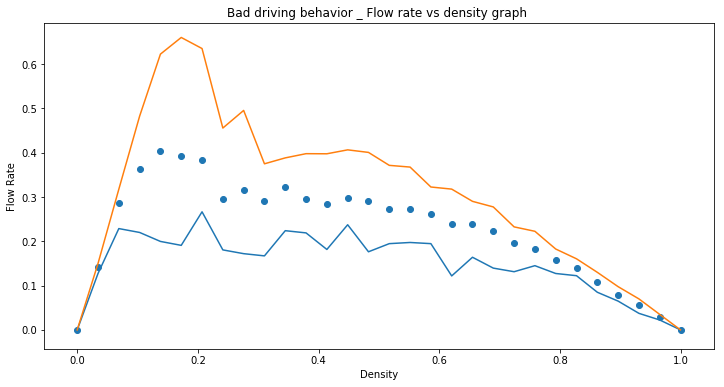

This two-lane model is made with with 100 road length, 0.1 slow down rate and 5 maximum velocity


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.scatter (densities,flow_rates_3[:,0])
plt.plot(densities,flow_rates_3[:,1])
plt.plot(densities,flow_rates_3[:,2])
plt.title ('Bad driving behavior _ Flow rate vs density graph ')
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.show()
print ('This two-lane model is made with with %i road length, %.1f slow down rate and %i maximum velocity' % (100,0.1,5))

In [ ]:
densities = np.linspace(0,1,num=30)
flow_rates = np.zeros((30,2))
repeats = 15
total = 100

#iterate through densities
for n in range(len(densities)):
    d = densities[n]
    #create empty array for averaging
    rate2 = np.zeros(repeats)
    rate4 = np.zeros(repeats)
    #repeat 20 times for each density
    for i in range(repeats):
        #run simulation
        fig2 = TrafficSimulation2(traffic_density=d, p_slow_down = 0.3)
        fig2.initial()
        fig4 = TrafficSimulation3(traffic_density=d, p_slow_down = 0.3)
        fig4.initial()
        for j in range(total):
            fig2.position_speed_change()
            fig2.update()
            fig4.change_lane()
            fig4.speed_change()
            fig4.update()
        rate2[i] = fig2.flow_count/(total*2)
        rate4[i] = fig4.flow_count/(total*2)
        #print(fig4.flow_rate)
    flow_rates[n,0] = (np.mean(rate2))
    flow_rates[n,1] = (np.mean(rate4))